In [4]:
from pathlib import Path
import heartkit as hk
import tensorflow as tf

# Download dataset
dataset = hk.datasets.IcentiaDataset(
    ds_path=Path("datasets/"), # Specify the path to the dataset
    task="classification", # Specify the task to perform
    frame_size=256, # Specify the frame size for the data
    target_rate=300, # Specify the target sampling rate for the data
    spec=(tf.TensorSpec(shape=(None, 256, 1), dtype=tf.float32), tf.TensorSpec(shape=(None,), dtype=tf.int32)) # Specify the input and output specifications for the data
)



TypeError: 'numpy.ndarray' object is not callable

In [20]:
dataset.get_rhythm_statistics(save_path='statistics/Icentia11k_global_stats.parquet')

,pt,rc,rhythm,start,stop,dur
0,9517,s00,1,105,102730,102625
1,9517,s00,1,121451,198720,77269
2,9517,s00,1,200706,228371,27665
3,9517,s00,1,229941,285848,55907
4,9517,s00,1,287771,299605,11834
...,...,...,...,...,...,...
17236062,8490,s49,1,827417,830146,2729
17236063,8490,s49,1,831167,835829,4662
17236064,8490,s49,1,837804,854213,16409
17236065,8490,s49,1,855507,875341,19834


In [22]:
import pandas as pd
# Read the Parquet file
df = pd.read_parquet('statistics/Icentia11k_global_stats.parquet')

# Now df is a DataFrame that contains the data from the Parquet file
print(df)

            pt   rc  rhythm   start     stop     dur
0         9517  s00       1     105   102730  102625
1         9517  s00       1  121451   198720   77269
2         9517  s00       1  200706   228371   27665
3         9517  s00       1  229941   285848   55907
4         9517  s00       1  287771   299605   11834
...        ...  ...     ...     ...      ...     ...
17236062  8490  s49       1  827417   830146    2729
17236063  8490  s49       1  831167   835829    4662
17236064  8490  s49       1  837804   854213   16409
17236065  8490  s49       1  855507   875341   19834
17236066  8490  s49       1  876592  1048570  171978

[17236067 rows x 6 columns]


In [28]:
df[df['rhythm'] == 2]

,pt,rc,rhythm,start,stop,dur
670,1673,s00,2,14902,22441,7539
671,1673,s00,2,23650,32193,8543
672,1673,s00,2,33240,35874,2634
673,1673,s00,2,36988,39183,2195
674,1673,s00,2,45299,46008,709
...,...,...,...,...,...,...
17200558,3458,s43,2,158590,208189,49599
17200577,3458,s45,2,386015,396030,10015
17200578,3458,s45,2,400568,402340,1772
17200579,3458,s45,2,404419,546834,142415


In [29]:
import os
import glob

directory = "datasets/icentia11k"
pattern = "*1673*"

# Use glob to get the list of files
files = glob.glob(f"{directory}/{pattern}")

# Use os.listdir to get the list of files
pat_id = os.listdir(directory)

files

['datasets/icentia11k/p01673.h5']

In [32]:
# Open the h5 file
with h5py.File(file_path, "r") as file:
    # Print the names of all groups and datasets in the file
    file.visit(print)

p01673
p01673/s00
p01673/s00/blabels
p01673/s00/data
p01673/s00/rlabels
p01673/s01
p01673/s01/blabels
p01673/s01/data
p01673/s01/rlabels
p01673/s02
p01673/s02/blabels
p01673/s02/data
p01673/s02/rlabels
p01673/s03
p01673/s03/blabels
p01673/s03/data
p01673/s03/rlabels
p01673/s04
p01673/s04/blabels
p01673/s04/data
p01673/s04/rlabels
p01673/s05
p01673/s05/blabels
p01673/s05/data
p01673/s05/rlabels
p01673/s06
p01673/s06/blabels
p01673/s06/data
p01673/s06/rlabels
p01673/s07
p01673/s07/blabels
p01673/s07/data
p01673/s07/rlabels
p01673/s08
p01673/s08/blabels
p01673/s08/data
p01673/s08/rlabels
p01673/s09
p01673/s09/blabels
p01673/s09/data
p01673/s09/rlabels
p01673/s10
p01673/s10/blabels
p01673/s10/data
p01673/s10/rlabels
p01673/s11
p01673/s11/blabels
p01673/s11/data
p01673/s11/rlabels
p01673/s12
p01673/s12/blabels
p01673/s12/data
p01673/s12/rlabels
p01673/s13
p01673/s13/blabels
p01673/s13/data
p01673/s13/rlabels
p01673/s14
p01673/s14/blabels
p01673/s14/data
p01673/s14/rlabels
p01673/s15
p01673/

In [41]:
import h5py
import neurokit2 as nk
import matplotlib.pyplot as plt

# Specify the path to the h5 file
file_path = "datasets/icentia11k/p01673.h5"

# Open the h5 file
with h5py.File(file_path, "r") as file:
    # Access the datasets
    data = file['p01673/s00/data'][:]

# Plot the signal using neurokit2
nk.signal_plot(data, sampling_rate=250)

KeyboardInterrupt: 

In [59]:
with h5py.File(file_path, "r") as file:
    pat_data = file['p01673/s00/data'][:]
    # beat label
    pat_blabel = file['p01673/s00/blabels'][:]
    pat_rlabel = file['p01673/s00/rlabels'][:]

In [99]:
from plotly.subplots import make_subplots
import physiokit as pk
import plotly.graph_objects as go

bg_color = "rgba(38,42,50,1.0)"
primary_color = "#11acd5"
secondary_color = "#ce6cff"
tertiary_color = "rgb(234,52,36)"
quaternary_color = "rgb(92,201,154)"
plotly_template = "plotly_dark"


classes = get_classes(params.num_classes)
class_names = get_class_names(params.num_classes)
class_map = get_class_mapping(params.num_classes)
input_spec = (
    tf.TensorSpec(shape=get_feat_shape(params.frame_size), dtype=tf.float32),
    tf.TensorSpec(shape=get_class_shape(params.frame_size, params.num_classes), dtype=tf.int32),
)

# Load data
ds = load_datasets(
    ds_path=params.ds_path,
    frame_size=10 * params.sampling_rate,
    sampling_rate=params.sampling_rate,
    spec=input_spec,
    class_map=class_map,
    datasets=params.datasets,
)[0]
x = next(ds.signal_generator(ds.uniform_patient_generator(patient_ids=ds.get_test_patient_ids(), repeat=False)))

# Run inference
runner.open()
logger.info("Running inference")
y_pred = np.zeros(x.size, dtype=np.int32)
for i in tqdm(range(0, x.size, params.frame_size), desc="Inference"):
    if i + params.frame_size > x.size:
        start, stop = x.size - params.frame_size, x.size
    else:
        start, stop = i, i + params.frame_size
    xx = prepare(x[start:stop], sample_rate=params.sampling_rate, preprocesses=params.preprocesses)
    runner.set_inputs(xx)
    runner.perform_inference()
    yy = runner.get_outputs()
    y_pred[start:stop] = np.argmax(yy, axis=-1).flatten()
# END FOR
runner.close()

# Report
logger.info("Generating report")
ts = np.arange(0, x.size) / params.sampling_rate

fig = make_subplots(
    rows=2,
    cols=3,
    specs=[
        [{"colspan": 3, "type": "xy", "secondary_y": True}, None, None],
        [{"type": "xy"}, {"type": "bar"}, {"type": "table"}],
    ],
    subplot_titles=("ECG Plot"),
    horizontal_spacing=0.1,
    vertical_spacing=0.2,
)

# Extract R peaks from QRS segments
pred_bounds = np.concatenate(([0], np.diff(y_pred).nonzero()[0] + 1, [y_pred.size - 1]))
peaks = []
for i in range(1, len(pred_bounds)):
    start, stop = pred_bounds[i - 1], pred_bounds[i]
    duration = 1000 * (stop - start) / params.sampling_rate
    if y_pred[start] == class_map.get(HeartSegment.qrs, -1) and (duration > 20):
        peaks.append(start + np.argmax(np.abs(x[start:stop])))
peaks = np.array(peaks)

band_names = ["VLF", "LF", "HF", "VHF"]
bands = [(0.0033, 0.04), (0.04, 0.15), (0.15, 0.4), (0.4, 0.5)]

# Compute R-R intervals
rri = pk.ecg.compute_rr_intervals(peaks)
mask = pk.ecg.filter_rr_intervals(rri, sample_rate=params.sampling_rate)
rri_ms = 1000 * rri / params.sampling_rate
# Compute metrics
if (rri.size <= 2) or (mask.sum() / mask.size > 0.80):
    logger.warning("High percentage of RR intervals were filtered out")
    hr_bpm = 0
    hrv_td = pk.hrv.HrvTimeMetrics()
    hrv_fd = pk.hrv.HrvFrequencyMetrics(bands=[pk.hrv.HrvFrequencyBandMetrics() for b in bands])
else:
    hr_bpm = 60 / (np.nanmean(rri[mask == 0]) / params.sampling_rate)
    hrv_td = pk.hrv.compute_hrv_time(rri[mask == 0], sample_rate=params.sampling_rate)
    hrv_fd = pk.hrv.compute_hrv_frequency(
        peaks[mask == 0], rri[mask == 0], bands=bands, sample_rate=params.sampling_rate
    )
# END IF

fig.add_trace(
    go.Scatter(
        x=ts,
        y=x,
        name="ECG",
        mode="lines",
        line=dict(color=primary_color, width=2),
    ),
    row=1,
    col=1,
    secondary_y=False,
)

for i, peak in enumerate(peaks):
    color = "red" if mask[i] else "white"
    fig.add_vline(
        x=ts[peak],
        line_width=1,
        line_dash="dash",
        line_color=color,
        annotation={"text": "R-Peak", "textangle": -90, "font_color": color},
        row=1,
        col=1,
        secondary_y=False,
    )
fig.update_xaxes(title_text="Time (s)", row=1, col=1)
fig.update_yaxes(title_text="ECG", row=1, col=1)

for i, label in enumerate(classes):
    if label <= 0:
        continue
    fig.add_trace(
        go.Scatter(
            x=ts,
            y=np.where(y_pred == label, x, np.nan),
            name=class_names[i],
            mode="lines",
            line_width=2,
        ),
        row=1,
        col=1,
        secondary_y=False,
    )
# END FOR

fig.update_layout(
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    template=plotly_template,
    height=800,
    plot_bgcolor=bg_color,
    paper_bgcolor=bg_color,
    margin=dict(l=10, r=10, t=80, b=80),
    title="HeartKit: Segmentation Demo",
)

1048577

# Frame usage

In [ ]:
y_pred = np.zeros(x.shape[0], dtype=np.int32)
for i in tqdm(range(0, x.shape[0], params.frame_size), desc="Inference"):
    if i + params.frame_size > x.shape[0]:
        start, stop = x.shape[0] - params.frame_size, x.shape[0]
    else:
        start, stop = i, i + params.frame_size
    xx = prepare(x[start:stop], sample_rate=params.sampling_rate, preprocesses=params.preprocesses)
    runner.set_inputs(xx)
    runner.perform_inference()
    yy = runner.get_outputs()
    y_pred[start:stop] = np.argmax(yy, axis=-1).flatten()

In [89]:
ann

In [94]:
rec.sig_name

In [88]:
import h5py
import numpy as np
import wfdb
from wfdb import Record, Annotation

patient_id=1673
segment_id=0
start=2000
length=1024

# Create a wfdb Record
rec = Record(
    record_name='p01673/s00',
    p_signal=pat_data,
    fs=250,
    # Add other necessary attributes...
)


ann = Annotation(record_name='p01673/s00', extension='atr', sample=pat_rlabel)

# Plot the record with the annotation
wfdb.plot_wfdb(record=rec, annotation=ann, plot_sym=True, figsize=(15, 4))


TypeError: 'NoneType' object is not iterable

In [67]:
from enum import IntEnum
from heartkit.defines import HeartBeat, HeartRate, HeartRhythm, HeartSegment


class IcentiaRhythm(IntEnum):
    """Icentia rhythm labels"""

    noise = 0
    normal = 1
    afib = 2
    aflut = 3
    end = 4


class IcentiaBeat(IntEnum):
    """Incentia beat labels"""

    undefined = 0
    normal = 1
    pac = 2
    aberrated = 3
    pvc = 4


class IcentiaHeartRate(IntEnum):
    """Icentia heart rate labels"""

    tachycardia = 0
    bradycardia = 1
    normal = 2
    noise = 3

# These map Icentia specific labels to common labels
HeartRhythmMap = {
    IcentiaRhythm.noise: HeartRhythm.noise,
    IcentiaRhythm.normal: HeartRhythm.normal,
    IcentiaRhythm.afib: HeartRhythm.afib,
    IcentiaRhythm.aflut: HeartRhythm.aflut,
    IcentiaRhythm.end: HeartRhythm.noise,
}

HeartBeatMap = {
    IcentiaBeat.undefined: HeartBeat.noise,
    IcentiaBeat.normal: HeartBeat.normal,
    IcentiaBeat.pac: HeartBeat.pac,
    IcentiaBeat.aberrated: HeartBeat.pac,
    IcentiaBeat.pvc: HeartBeat.pvc,
}



In [68]:
import json
from heartkit.tasks.arrhythmia.defines import *
from heartkit.datasets import DatasetFactory, HKDataset, augment_pipeline, preprocess_pipeline
from collections.abc import Iterable


with open('configs/arrhythmia-class-3.json', "r", encoding="utf-8") as file:
        # config = json.load(file)
        params = json.load(file)

# params = hk.HKTrainParams.model_validate(config)
params['datasets'] = 'icentia11k'

nlabel_threshold = 0.25
blabel_padding = 20
sampling_rate = 250
target_rate = 250

rr_win_len = int(10 * sampling_rate)
rr_min_len = int(0.3 * sampling_rate)
rr_max_len = int(2.0 * sampling_rate)

classes = get_classes(params['num_classes'])
class_names = get_class_names(params['num_classes'])
class_map = get_class_mapping(params['num_classes'])

# Target labels and mapping
num_classes = len(set(class_map.values()))

# Convert Icentia labels -> HK labels -> class map labels (-1 indicates not in class map)
tgt_map = {k: class_map.get(v, -1) for (k, v) in HeartBeatMap.items()}
samples_per_patient = [
    25,
    200
  ]
# If samples_per_patient is a list, then it must be the same length as nclasses
if isinstance(samples_per_patient, Iterable):
    samples_per_tgt = samples_per_patient
else:
    num_per_tgt = int(max(1, samples_per_patient / num_classes))
    samples_per_tgt = num_per_tgt * [num_classes]

input_size = int(np.round((sampling_rate / target_rate) * params['frame_size']))

In [71]:
tgt_labels = list(set(class_map.values()))

# Convert Icentia labels -> HK labels -> class map labels (-1 indicates not in class map)
tgt_map = {k: class_map.get(v, -1) for (k, v) in HeartRhythmMap.items()}

pt_tgt_seg_map = [[] for _ in tgt_labels]

In [74]:
import random

seg_idx = 0
# Grab rhythm labels
rlabels = pat_rlabel

# Skip if no rhythm labels
if not rlabels.shape[0]:
    print('No rhythm labels')
# remove noise
rlabels = rlabels[np.where(rlabels[:, 1] != IcentiaRhythm.noise.value)[0]]
if not rlabels.shape[0]:
    print('No rhythm labels after removing noise')

# Unpack start, end, and label
xs, xe, xl = rlabels[0::2, 0], rlabels[1::2, 0], rlabels[0::2, 1]

# Map labels to target labels
xl = np.vectorize(tgt_map.get, otypes=[int])(xl)

# Capture segment, start, and end for each target label
for tgt_idx, tgt_class in enumerate(tgt_labels):
    idxs = np.where((xe - xs >= input_size) & (xl == tgt_class))
    seg_vals = np.vstack((seg_idx * np.ones_like(idxs), xs[idxs], xe[idxs])).T
    pt_tgt_seg_map[tgt_idx] += seg_vals.tolist()
# END FOR
# END FOR
pt_tgt_seg_map = [np.array(b) for b in pt_tgt_seg_map]

# Grab target segments
seg_samples: list[tuple[int, int, int, int]] = []
for tgt_idx, tgt_class in enumerate(tgt_labels):
    tgt_segments = pt_tgt_seg_map[tgt_idx]
    if not tgt_segments.shape[0]:
        continue
    tgt_seg_indices: list[int] = random.choices(
        np.arange(tgt_segments.shape[0]),
        weights=tgt_segments[:, 2] - tgt_segments[:, 1],
        k=samples_per_tgt[tgt_idx],
    )
    for tgt_seg_idx in tgt_seg_indices:
        seg_idx, rhy_start, rhy_end = tgt_segments[tgt_seg_idx]
        frame_start = np.random.randint(rhy_start, rhy_end - input_size + 1)
        frame_end = frame_start + input_size
        seg_samples.append((seg_idx, frame_start, frame_end, tgt_class))
    # END FOR
    # END FOR

In [75]:
def rhythm_data_generator(
self,
patient_generator: PatientGenerator,
samples_per_patient: int | list[int] = 1,
) -> SampleGenerator:
"""Generate frames w/ rhythm labels (e.g. afib) using patient generator.

Args:
    patient_generator (PatientGenerator): Patient Generator
    samples_per_patient (int | list[int], optional): # samples per patient. Defaults to 1.

Returns:
    SampleGenerator: Sample generator

Yields:
    Iterator[SampleGenerator]
"""
# Target labels and mapping
tgt_labels = list(set(self.class_map.values()))

# Convert Icentia labels -> HK labels -> class map labels (-1 indicates not in class map)
tgt_map = {k: self.class_map.get(v, -1) for (k, v) in HeartRhythmMap.items()}
num_classes = len(tgt_labels)

# If samples_per_patient is a list, then it must be the same length as nclasses
if isinstance(samples_per_patient, Iterable):
    # now samples_per_tgt will match 
    samples_per_tgt = samples_per_patient
else:
    num_per_tgt = int(max(1, samples_per_patient / num_classes))
    samples_per_tgt = num_per_tgt * [num_classes]

input_size = int(np.round((self.sampling_rate / self.target_rate) * self.frame_size))

# Group patient rhythms by type (segment, start, stop, delta)
for _, segments in patient_generator: # this for loop is traversing through all patients inside patient_generator
    # This maps segment index to segment key
    seg_map: list[str] = list(segments.keys())

    pt_tgt_seg_map = [[] for _ in tgt_labels]
    for seg_idx, seg_key in enumerate(seg_map):
        # Grab rhythm labels
        rlabels = segments[seg_key]["rlabels"][:]

        # Skip if no rhythm labels
        if not rlabels.shape[0]:
            continue
        rlabels = rlabels[np.where(rlabels[:, 1] != IcentiaRhythm.noise.value)[0]]
        # Skip if only noise
        if not rlabels.shape[0]:
            continue

        # Unpack start, end, and label
        xs, xe, xl = rlabels[0::2, 0], rlabels[1::2, 0], rlabels[0::2, 1]

        # Map labels to target labels
        xl = np.vectorize(tgt_map.get, otypes=[int])(xl)

        # Capture segment, start, and end for each target label, we are also grouping them here
        for tgt_idx, tgt_class in enumerate(tgt_labels):
            idxs = np.where((xe - xs >= input_size) & (xl == tgt_class)) # we want to find a large enough frame which does contain the current class of label
            seg_vals = np.vstack((seg_idx * np.ones_like(idxs), xs[idxs], xe[idxs])).T
            pt_tgt_seg_map[tgt_idx] += seg_vals.tolist()
        # END FOR
    # END FOR
            
            
    pt_tgt_seg_map = [np.array(b) for b in pt_tgt_seg_map] # pt_tgt_seg_map will be grouped by rlabel
    # for i, segments in enumerate(pt_tgt_seg_map):
    #     print(f"Target label {i} has {len(segments)} segments")

    ## Sample Generation starts from here
    # Grab target segments
    seg_samples: list[tuple[int, int, int, int]] = []
    for tgt_idx, tgt_class in enumerate(tgt_labels):
        tgt_segments = pt_tgt_seg_map[tgt_idx]
        if not tgt_segments.shape[0]:
            continue
        #TODO: check the samplers_per_tgt
        # print(f"Current tgt class: {tgt_class} and Samples per tgt: {samples_per_tgt[tgt_idx]}")


        # print(f"Double check the tgt segments {tgt_segments}")
        tgt_seg_indices: list[int] = random.choices(
            np.arange(tgt_segments.shape[0]),
            weights=tgt_segments[:, 2] - tgt_segments[:, 1], # proportional to the length of every segment
            k=samples_per_tgt[tgt_idx],
        ) # a number of indices equal to the number of samples for the current target label.

        # print(f"Overall tgt segment indices: {len(tgt_seg_indices)}") # should be 25 or 200 different tgt_seg_idx

        for tgt_seg_idx in tgt_seg_indices:
            seg_idx, rhy_start, rhy_end = tgt_segments[tgt_seg_idx] # it should look something like this: [0     989   27860]
            frame_start = np.random.randint(rhy_start, rhy_end - input_size + 1) # randomly select a frame within the segment sample
            frame_end = frame_start + input_size
            seg_samples.append((seg_idx, frame_start, frame_end, tgt_class))
        # END FOR
    # END FOR

    # Shuffle segments
    random.shuffle(seg_samples)

    # Yield selected samples for patient
    for seg_idx, frame_start, frame_end, label in seg_samples:
        x: npt.NDArray = segments[seg_map[seg_idx]]["data"][frame_start:frame_end].astype(np.float32)
        if self.sampling_rate != self.target_rate:
            x = pk.signal.resample_signal(x, self.sampling_rate, self.target_rate, axis=0)
        yield x, label
    # END FOR
# END FOR

[(0, 1018098, 1018498, 1),
 (0, 624216, 624616, 1),
 (0, 520013, 520413, 1),
 (0, 538306, 538706, 1),
 (0, 590110, 590510, 1),
 (0, 875929, 876329, 1),
 (0, 350533, 350933, 1),
 (0, 262793, 263193, 1),
 (0, 271614, 272014, 1),
 (0, 373597, 373997, 1),
 (0, 410680, 411080, 1),
 (0, 20300, 20700, 1),
 (0, 856793, 857193, 1),
 (0, 685662, 686062, 1),
 (0, 150329, 150729, 1),
 (0, 711059, 711459, 1),
 (0, 261553, 261953, 1),
 (0, 681388, 681788, 1),
 (0, 504639, 505039, 1),
 (0, 740413, 740813, 1),
 (0, 190630, 191030, 1),
 (0, 691377, 691777, 1),
 (0, 854838, 855238, 1),
 (0, 353997, 354397, 1),
 (0, 247705, 248105, 1),
 (0, 450536, 450936, 1),
 (0, 638372, 638772, 1),
 (0, 495967, 496367, 1),
 (0, 432071, 432471, 1),
 (0, 519857, 520257, 1),
 (0, 181833, 182233, 1),
 (0, 349886, 350286, 1),
 (0, 129692, 130092, 1),
 (0, 164983, 165383, 1),
 (0, 315188, 315588, 1),
 (0, 338603, 339003, 1),
 (0, 189583, 189983, 1),
 (0, 957127, 957527, 1),
 (0, 344405, 344805, 1),
 (0, 68295, 68695, 1),
 (

In [79]:
import ecg_plot

ecg = load_data() # load data should be implemented by yourself 
ecg_plot.plot_1(ecg[1], sample_rate=500, title = 'ECG')
ecg_plot.show()

NameError: name 'load_data' is not defined

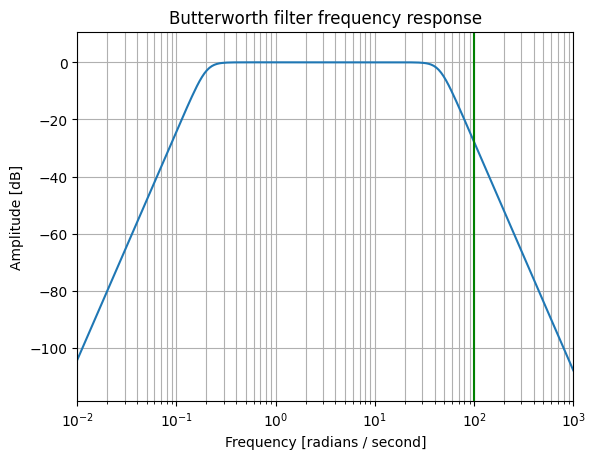

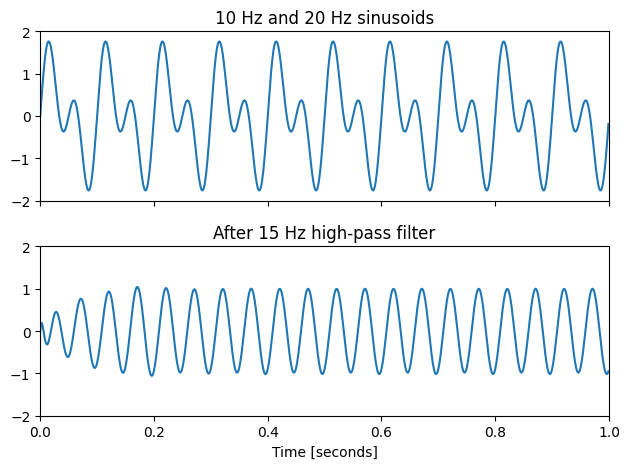

In [77]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np


b, a = signal.butter(4, [0.2, 45.], 'bandpass', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])

sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

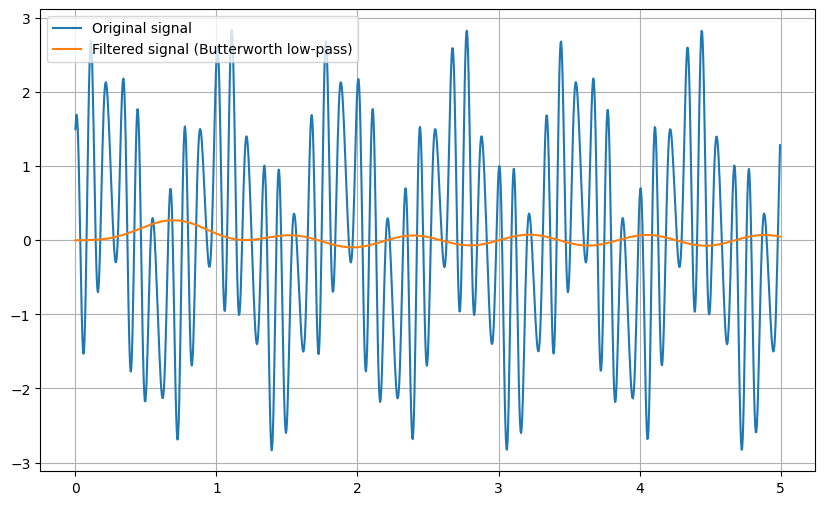

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Function to apply Butterworth filter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parameters for the Butterworth filter
order = 3
fs = 250.0       # sample rate, Hz
cutoff = 0.5  # desired cutoff frequency of the filter, Hz

# Generate some data for demonstration (replace this with your actual data)
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Apply the filter
filtered_data = butter_lowpass_filter(data, cutoff, fs, order)

# Plot the original and filtered signals
plt.figure(figsize=(10, 6))
plt.plot(t, data, label='Original signal')
plt.plot(t, filtered_data, label='Filtered signal (Butterworth low-pass)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [62]:
IcentiaBeat

num_blabels = pat_blabel.shape[0]

# If too few normal beats, skip
num_nlabels = np.sum(pat_blabel[:, 1] == IcentiaBeat.normal)
if num_nlabels / num_blabels < nlabel_threshold:
    print('Too few normal beats')

array([[    379,       0],
       [    917,       0],
       [   1053,       0],
       ...,
       [1048322,       1],
       [1048443,       1],
       [1048574,       1]], dtype=int32)

In [56]:
import json
from heartkit.tasks.arrhythmia.defines import *
from heartkit.datasets import DatasetFactory, HKDataset, augment_pipeline, preprocess_pipeline


with open('configs/arrhythmia-class-3.json', "r", encoding="utf-8") as file:
        # config = json.load(file)
        params = json.load(file)

# params = hk.HKTrainParams.model_validate(config)
params['datasets'] = 'icentia11k'

classes = get_classes(params['num_classes'])
class_names = get_class_names(params['num_classes'])
class_map = get_class_mapping(params['num_classes'])
input_spec = (
    tf.TensorSpec(shape=get_feat_shape(params['frame_size']), dtype=tf.float32),
    tf.TensorSpec(shape=get_class_shape(params['frame_size'], params['num_classes']), dtype=tf.int32),
)

tmp = DatasetFactory.get('icentia11k')(
                ds_path="datasets/icentia11k/p01673.h5",
                task="arrhythmia",
                frame_size=params['frame_size'],
                target_rate=params['sampling_rate'],
                class_map=class_map,
                spec=input_spec
            )

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [36]:
import h5py
import numpy as np
import wfdb
from wfdb import Record, Annotation

# Specify the path to the h5 file
file_path = "datasets/icentia11k/p01673.h5"

# Open the h5 file
with h5py.File(file_path, "r") as file:
    # Read the data from the h5 file
    data = file['p01673/s00/data'][:]  # replace 'your_dataset_name' with the actual dataset name in the h5 file

# Create a wfdb Record
rec = Record(
    record_name='p01673/s00',
    p_signal=data,
    fs=250,
    # Add other necessary attributes...
)

# Create a wfdb Annotation
# You need to provide the sample numbers (annsamp) and the annotation symbols (anntype)
annsamp = np.array([0, 150, 300, 450])  # replace with your actual sample numbers
anntype = ['N', 'N', 'N', 'N']  # replace with your actual annotation symbols
ann = Annotation(record_name='p01673/s00', extension='atr', sample=)

# Plot the record with the annotation
wfdb.plot_wfdb(record=rec, annotation=ann, plot_sym=True, figsize=(15, 4))


TypeError: Annotation.__init__() missing 1 required positional argument: 'sample'

In [19]:
import json
import os
config_file = 'arrhythmia-class-2.json'
config_file_path = os.path.join("configs", config_file)
with open(config_file_path, "r", encoding="utf-8") as file:
    config = json.load(file)
config

{'job_dir': './results/arrhythmia-class-2',
 'ds_path': './datasets',
 'datasets': [{'name': 'icentia11k', 'params': {}}],
 'num_classes': 2,
 'sampling_rate': 100,
 'frame_size': 400,
 'model_file': './results/arrhythmia-class-2/model.keras',
 'samples_per_patient': [25, 200],
 'train_patients': 10000,
 'val_file': './results/arrhythmia-class-2-10000pt-100fs-4s.pkl',
 'val_samples_per_patient': [25, 200],
 'val_patients': 0.2,
 'val_size': 100000,
 'threshold': 0.75,
 'test_samples_per_patient': [10, 100],
 'test_patients': 1000,
 'test_size': 20000,
 'batch_size': 256,
 'buffer_size': 100000,
 'epochs': 125,
 'steps_per_epoch': 20,
 'val_metric': 'loss',
 'lr_rate': 0.001,
 'lr_cycles': 1,
 'val_acc_threshold': 0.98,
 'tflm_var_name': 'g_arrhythmia_model',
 'tflm_file': './results/arrhythmia-class-2/arrhythmia_model_buffer.h',
 'backend': 'pc',
 'quantization': {'enabled': True,
  'qat': False,
  'ptq': True,
  'input_type': 'int8',
  'output_type': 'int8',
  'supported_ops': None},


In [7]:
# how do you get the Arr patients
arr_pat = dataset.arr_rhythm_patients
# random patients from Arr
rd_pat = dataset.random_patient_generator(arr_pat)

In [10]:
# Use the generator to get patient id and data
for patient_id, patient_data in rd_pat:
    # Now you can use patient_id and patient_data
    print(f"Patient ID: {patient_id}")
    print(f"Patient Data: {patient_data}")

Patient ID: 10694
Patient Data: <HDF5 group "/p10694" (50 members)>
Patient ID: 3484
Patient Data: <HDF5 group "/p03484" (50 members)>
Patient ID: 8630
Patient Data: <HDF5 group "/p08630" (50 members)>
Patient ID: 7553
Patient Data: <HDF5 group "/p07553" (50 members)>
Patient ID: 5466
Patient Data: <HDF5 group "/p05466" (50 members)>
Patient ID: 4764
Patient Data: <HDF5 group "/p04764" (49 members)>
Patient ID: 7950
Patient Data: <HDF5 group "/p07950" (50 members)>
Patient ID: 3468
Patient Data: <HDF5 group "/p03468" (50 members)>
Patient ID: 5542
Patient Data: <HDF5 group "/p05542" (31 members)>
Patient ID: 7684
Patient Data: <HDF5 group "/p07684" (50 members)>
Patient ID: 6249
Patient Data: <HDF5 group "/p06249" (50 members)>
Patient ID: 3218
Patient Data: <HDF5 group "/p03218" (50 members)>
Patient ID: 2098
Patient Data: <HDF5 group "/p02098" (50 members)>
Patient ID: 7045
Patient Data: <HDF5 group "/p07045" (50 members)>
Patient ID: 2860
Patient Data: <HDF5 group "/p02860" (20 memb

KeyboardInterrupt: 